In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

%matplotlib inline

# Linear algebra

## Euclidean distance basic calculation

In [61]:
a1, a2, b1, b2 = sym.symbols('a_1, a_2, b_1, b_2,')
a = sym.Matrix([a1,a2])
b = sym.Matrix([b1,b2])
Euclidean_distance = sym.sqrt(sym.DotProduct(a-b,a-b)).doit()
Euclidean_distance

sqrt((a_1 - b_1)**2 + (a_2 - b_2)**2)

# Statistics

## Normal distribution in 3D (Bivariate case)

In [62]:
def norm3D(x, y, mean, sigma):
    ret = np.zeros([len(x), len(y)])
    for iCount, i in enumerate(x):
        for jCount, j in enumerate(y):
            X = np.array([[i], [j]])
            ret[iCount, jCount] = np.exp(-(1/2)*np.dot(np.transpose(X-mean),
                                                       np.dot(np.linalg.inv(sigma), (X-mean))))
    return ret / np.sqrt(((2*np.pi)**2)*np.linalg.det(sigma))

# Basic plotting

## Bar plot in 3D (Mainly for Parzen)

In [63]:
def barPlot3D(x,y,p,h_n):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x,y)
    x = X.reshape(-1)
    y = Y.reshape(-1)
    p = p.reshape(-1)
    ax.bar3d(x,y,np.zeros_like(p),h_n*np.ones_like(p),h_n*np.ones_like(p),p)
    plt.show()

## Surface plot in 3D

### Singular

In [64]:
def plotSurf3D(x,y,p):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y,p)
    ax.view_init(elev=15,azim=50)
    plt.show()

### Multiple

In [65]:
def plotMultipleSurf3D(x,y,p,colors=None):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x,y)
    if colors is None:
        for z in p:
            ax.plot_surface(X,Y,z,alpha=0.8)
            ax.view_init(elev=15,azim=50)
    else:
        for i, z in enumerate(p):
            ax.plot_surface(X,Y,z,alpha=0.8,color=colors[i])
            ax.view_init(elev=15,azim=50)
    plt.show()

# Bayes decision theory

## Discriminant functions

## Case I

Given a diagonal covariance matrix:
$$\Sigma=\sigma^2 I$$

The discriminant function can be calculated as:

$$g_i (x)=-\frac{1}{2\sigma^2}||x-\mu_i||^2 + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i (x)=-\frac{1}{2\sigma ^2}||x-\mu_i||^2$$

A Alternative representation is:

$$g_i=\theta_i^Tx + \theta_{i0} $$

With:

$$\theta_i = \frac{1}{\sigma^2}\mu_i$$
$$\theta_{i0} = -\frac{1}{2\sigma^2}\mu_i^T\mu_i +ln(P(\omega_i))$$

In [66]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
sigma = sym.symbols('\sigma')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
mu = sym.Matrix([mu1, mu2])

# sigma = 1.5
# mu = sym.Matrix([3,2])

g = (-1/(2*(sigma**2)))*(sym.transpose(x-mu)*(x-mu)) + sym.Matrix([sym.log(Pi)])

g = (-1/(2*(sigma**2)))*(sym.transpose(x-mu)*(x-mu))
sym.simplify(g)


Matrix([[(-(\mu_1 - x_1)**2 - (\mu_2 - x_2)**2)/(2*\sigma**2)]])

## Case II

Given a *symmetrical* $\Sigma_i = \Sigma$:
$$
\Sigma=
\left(\begin{array}{cc} 
\sigma_{1} ^2 & . & \sigma_{1,l}\\
. & . & .\\
\sigma_{1,l} & . & \sigma_{l} ^2
\end{array}\right)
$$ 

The discriminant function can be calculated as:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)$$

A Alternative representation is:

$$g_i=\theta_i^Tx + \theta_{i0} $$

With:

$$\theta_i = \Sigma^{-1}\mu_i$$
$$\theta_{i0} = -\frac{1}{2}\mu_i^T\Sigma^{-1}\mu_i+ln(P(\omega_i))$$

In [67]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
s11, s12, s21, s22 = sym.symbols('\sigma_11, \sigma_12, \sigma_21, \sigma_22')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
sigma = sym.Matrix([[s11,s12],[s21,s22]])
mu = sym.Matrix([mu1, mu2])

# sigma = sym.Matrix([[1,2],[3,4]])
# mu = sym.Matrix([3,2])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) + sym.Matrix([sym.log(Pi)])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu))
sym.simplify(g)


Matrix([[0.5*((\mu_1 - x_1)*(\sigma_21*(\mu_2 - x_2) - \sigma_22*(\mu_1 - x_1)) - (\mu_2 - x_2)*(\sigma_11*(\mu_2 - x_2) - \sigma_12*(\mu_1 - x_1)))/(\sigma_11*\sigma_22 - \sigma_12*\sigma_21)]])

## Case III

Given a *arbitrary* $\Sigma_i$ (Class dependent),

The discriminant function can be calculated as:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma_i ^{-1} (x-\mu) - \frac{1}{2}ln(|\Sigma_i|) + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) - \frac{1}{2}ln(|\Sigma_i|)$$

A Alternative representation is:

$$g_i= x^T\Theta_ix + \theta_i^Tx + \theta_{i0} $$

With:

$$\Theta_i = -\frac{1}{2}\Sigma_i^{-1}$$
$$\theta_i = \Sigma^{-1}\mu_i$$
$$\theta_{i0} = -\frac{1}{2}\mu_i^T\Sigma^{-1}\mu_i- \frac{1}{2}ln(|\Sigma_i|) +ln(P(\omega_i))$$

In [68]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
s11, s12, s21, s22 = sym.symbols('\sigma_11, \sigma_12, \sigma_21, \sigma_22')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
sigma = sym.Matrix([[s11,s12],[s21,s22]])
mu = sym.Matrix([mu1, mu2])

# sigma = sym.Matrix([[1,2],[3,4]])
# mu = sym.Matrix([3,2])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) - sym.Matrix([(1/2)*sym.log(sym.det(sigma))]) + sym.Matrix([sym.log(Pi)])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) - sym.Matrix([(1/2)*sym.log(sym.det(sigma))])
sym.simplify(g)



Matrix([[0.5*((\mu_1 - x_1)*(\sigma_21*(\mu_2 - x_2) - \sigma_22*(\mu_1 - x_1)) - (\mu_2 - x_2)*(\sigma_11*(\mu_2 - x_2) - \sigma_12*(\mu_1 - x_1)) - (\sigma_11*\sigma_22 - \sigma_12*\sigma_21)*log(\sigma_11*\sigma_22 - \sigma_12*\sigma_21))/(\sigma_11*\sigma_22 - \sigma_12*\sigma_21)]])

## Testing with exam 2021 version A, task 1 g-i

**Case II**

In [69]:
sigma1 = sym.Matrix([[0.5,0],[0,0.5]])
mu1 = sym.Matrix([-1.5,-1.5])
P1 = 0.2

sigma2 = sym.Matrix([[1,0],[0,0.5]])
mu2 = sym.Matrix([1.5,1.5])
P2 = 0.6

sigma3 = sym.Matrix([[0.5,0],[0,0.5]])
mu3 = sym.Matrix([0,0])
P3 = 0.2

g1 = (-1/(2))*(sym.transpose(x-mu1)* sigma1**-1 *(x-mu1)) + sym.Matrix([sym.log(P1)])
g2 = (-1/(2))*(sym.transpose(x-mu2)* sigma2**-1 *(x-mu2)) + sym.Matrix([sym.log(P2)])
g3 = (-1/(2))*(sym.transpose(x-mu3)* sigma3**-1 *(x-mu3)) + sym.Matrix([sym.log(P3)])
# sym.expand(g1) # Verified, note: Constant wrong, probably due to rounding errors? -5.42 =|= -6.109...
# sym.expand(g2) # Verified, note: Constant wrong, probably due to rounding errors? -3.54 =|= -3.886...
# sym.expand(g3) # Verified, note: Constant wrong, probably due to rounding errors? -0.916 =|= -1.609...

# Parameter estimation

Assumptions:

1. The samples in $\chi_i$ have been independently drawn from $p(x|\omega_i)$.
2. $p(x|\omega_i)$ has a known type of distribution with form defined by parameters in $\Theta_i$.

From this the distribution is denoted as:

$$p(x|\omega_i,\Theta_i)$$

For gaussian distributions $\Theta_i$ then consists of elements from $\mu_i$ and $\Sigma_i$.

The methodology is to estimate $\Theta_i$ from provided data.

## Likelihood

Likelihood of a dataset explained by a given $\Theta_i$:

$$p(\chi_i,\Theta_i)=\prod_{k=1}^N p(x_n,\Theta_i)$$

Estimate the $\Theta$ to obtain maximum likelihood, which is done by differentiating and setting equal to 0, solving for $\Theta$.

This is much easier when using log-likelihoods.

For a monovariable gaussian distribution:

In [70]:
dataset = np.array([0,0,1,1,2,2])
N       = len(dataset)
mu      = 1/N * sum(dataset)
sigma   = 1/N * sum((dataset-mu)**2)
print(f'\mu is: {mu}\n\sigma is: {sigma}')

\mu is: 1.0
\sigma is: 0.6666666666666666


For a multivariate gaussian distribution:

In [71]:
dataset = np.array([[0,0,1,1,2,2],[0,0,2,2,4,4],[0,0,.2,.2,.4,.4]])
numClasses = len(dataset)
dataLen = len(dataset[0])
mu = np.zeros([numClasses,1])
sigma = np.zeros([numClasses,1])
for i, data in enumerate(dataset):
    mu[i]      = 1/N * np.sum(data)
    sigma[i]   = 1/N * np.dot(data-mu[i],(data-mu[i]))
    print(f'\mu_{i} is: {mu[i][0]}\n\sigma_{i}^2 is: {sigma[i][0]}')

\mu_0 is: 1.0
\sigma_0^2 is: 0.6666666666666666
\mu_1 is: 2.0
\sigma_1^2 is: 2.6666666666666665
\mu_2 is: 0.2
\sigma_2^2 is: 0.026666666666666672


# Non-parametric estimation

In contrast to parameter estimation, non-parametric estimation doesn't assume the form distribution to be known.

## Regional density

Regional density is as the name suggests a method that calculate how densely packed a amount of datapoints are within a region, in comparison to the total number of datapoints.

This then can be specified further into two approaches;
1. Choosing a volume before calculating, which is the Parzen window technique.
2. Choosing a number of elements per point before calculating, which is the K-nearest technique.

The probability from these are calculated as:

$$p(x) = \frac{\frac{k_n}{N}}{V_n}$$

Where $k_n$ is the number of elements, and $V_n$ is the volume.

### Parzen window technique

Typically the volume is set to:

$$V_n=\frac{1}{\sqrt N}$$

In [72]:
dataset = np.array([[[1,1],[2,2],[2,2],[1,2],[2,2]],
                    [[2,3],[3,4],[2,2],[1,2],[2,2]],
                    [[1,0],[3,2],[2,2],[1,2],[2,2]],
                    [[1,3],[2,4],[2,2],[1,2],[2,2]]])
numClasses = len(dataset)
numDims = np.shape(dataset)[2]
x = y = np.linspace(-2,5,100)
p = np.zeros([numClasses,len(x),len(y)])
h_n = np.zeros([numClasses,1])
for i, data in enumerate(dataset):
    N = len(data)
    h_n[i] = 1/np.sqrt(N)
    for p1, x1 in enumerate(x):
        for p2, x2 in enumerate(y):
            count = 0
            for d in data:
                if np.sqrt(np.dot((np.array([x1,x2])-d),(np.array([x1,x2])-d)))/h_n[i] <= 1/2:
                    count += 1
            p[i,p1,p2] = (count/N)/h_n[i]

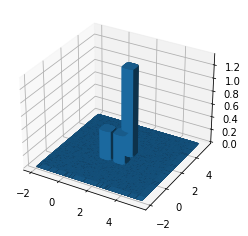

In [73]:
barPlot3D(x,y,p[0],h_n[0])

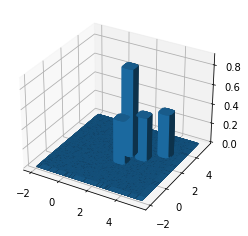

In [74]:
barPlot3D(x,y,p[1],h_n[1])

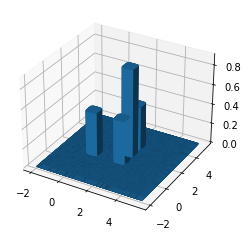

In [75]:
barPlot3D(x,y,p[2],h_n[2])

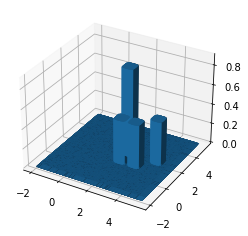

In [76]:
barPlot3D(x,y,p[3],h_n[3])

This also introduces sharp edges though, and is therefore not a very good PDF. Instead a good approximation is a gaussian distribution with the parameters:

$$\mu_i=x_i$$

$$\sigma_i=h_n^2$$

In [77]:
dataset = np.array([[[1,1],[2,2],[2,2],[1,2],[2,2]],
                    [[2,3],[3,4],[2,2],[1,2],[2,2]],
                    [[1,0],[3,2],[2,2],[1,2],[2,2]],
                    [[1,3],[2,4],[2,2],[1,2],[2,2]]])
numClasses = len(dataset)
numDims = np.shape(dataset)[2]
x = y = np.linspace(-2,5,100)
p = np.zeros([numClasses,len(x),len(y)])
h_n = np.zeros([numClasses,1])
for i, data in enumerate(dataset):
    N = len(data)
    h_n[i] = 1/np.sqrt(N)
    for d in data:
        d = d.reshape([2,1])
        p[i,:,:] += norm3D(x,y,d,(h_n[i]**2)*np.eye(2))

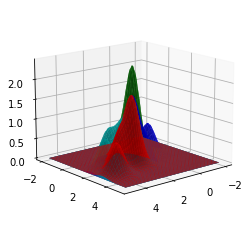

In [78]:
colors = ['g','r','b','c']
plotMultipleSurf3D(x,y,p,colors=colors)

### K-nearest technique

Typically the number of elements per point is set to:

$$k_n=\sqrt N$$

# Linear discriminant functions

@TODO

# Neural networks

@TODO

# Clustering

@TODO

# Evaluation of classifiers

@TODO